#**1. 라이브러리 불러오기**

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# **2. 데이터 생성**

In [14]:
np.random.seed(0)
samples = 1000
x1 = np.random.uniform(0, 1, samples)
x2 = np.random.uniform(0, 1, samples)
X = np.column_stack((x1, x2))              # shape: (1000, 2)
y = (2 * x1 + 3 * x2 - 1).reshape(-1, 1)   # shape: (1000, 1)

# **3. 하이퍼파라미터 및 초기화**

In [15]:
input_dim = 2
hidden_dim = 3
output_dim = 1

lr = 0.01
epochs = 50

# 가중치·편향 초기화 (정규분포)
W1 = np.random.randn(input_dim, hidden_dim) * 0.1
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim) * 0.1
b2 = np.zeros((1, output_dim))

# Sigmoid 및 도함수
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# 손실 기록용 리스트
mse_list = []
mape_list = []

# **4. 학습 루프**

In [16]:
for epoch in range(1, epochs + 1):
    # --- 순전파 ---
    Z1 = X.dot(W1) + b1             # (1000, 3)
    A1 = sigmoid(Z1)                # (1000, 3)
    Z2 = A1.dot(W2) + b2            # (1000, 1)  → 예측값 (선형)
    y_pred = Z2

    # --- 손실 계산 ---
    error = y_pred - y              # (1000,1)
    mse  = np.mean(error**2)
    mape = np.mean(np.abs(error / y)) * 100
    mse_list.append(mse)
    mape_list.append(mape)

    # --- 역전파 (MSE 기준) ---
    dZ2 = error                     # (1000,1)
    dW2 = A1.T.dot(dZ2) / samples
    db2 = np.sum(dZ2, axis=0, keepdims=True) / samples

    dA1 = dZ2.dot(W2.T)             # (1000,3)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = X.T.dot(dZ1) / samples
    db1 = np.sum(dZ1, axis=0, keepdims=True) / samples

    # --- 파라미터 업데이트 ---
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    # 진행 상황 출력
    if epoch % 10 == 0 or epoch == 1:
        print(f"Epoch {epoch:02d}/{epochs} → MSE: {mse:.4f}, MAPE: {mape:.2f}%")

Epoch 01/50 → MSE: 3.6653, MAPE: 124.06%
Epoch 10/50 → MSE: 2.9854, MAPE: 150.76%
Epoch 20/50 → MSE: 2.4429, MAPE: 227.17%
Epoch 30/50 → MSE: 2.0597, MAPE: 296.20%
Epoch 40/50 → MSE: 1.7889, MAPE: 356.51%
Epoch 50/50 → MSE: 1.5976, MAPE: 408.90%


# **5. 최종 평가**

In [17]:
print(f"  - MSE : {mse_list[-1]:.4f}")
print(f"  - MAPE: {mape_list[-1]:.2f}%")

  - MSE : 1.5976
  - MAPE: 408.90%


# **6. 손실 시각화**

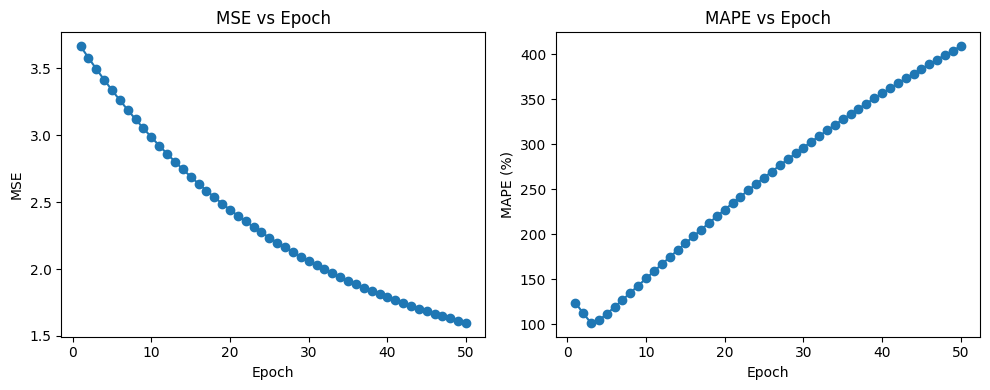

In [18]:
plt.figure(figsize=(10,4))

# MSE plot
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), mse_list, marker='o')
plt.title("MSE vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("MSE")

# MAPE plot
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), mape_list, marker='o')
plt.title("MAPE vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("MAPE (%)")

plt.tight_layout()
plt.show()